In [1]:
import os
import pandas as pd
import json
import re

PL_WDC_NORMALIZED_PATH = os.path.join(
    os.path.abspath(''),
    '../pl_wdc_non_normalized.json'
)

products = []
for line in open(PL_WDC_NORMALIZED_PATH, 'r'):
    products.append(json.loads(line))

In [2]:
print(products[:10])

[{'cluster_id': '5903683001706', 'identifiers': [{'EAN': ['5903683001706']}], 'category': 'chemia', 'title': 'Mola Ultra Chłonne Ręczniki papierowe 4 rolki', 'description': 'Super chłonne i wytrzymałe ręczniki papierowe\nNowe ręczniki papierowe Mola Ultra Chłonne dzięki nowej, lepszej jakości i znacznie zwiększonej chłonności (+20% bardziej chłonne w porównaniu do standardowych ręczników Mola GIGA XL*) tak jak gąbka szybko i skutecznie usuną każdą mokrą plamę.\nIdealne do wszystkich prac domowych.\n\nRęczniki papierowe, 100% celuloza\n\n* 20% bardziej chłonne niż Mola GIGA XL na maj 2016', 'brand': 'Mola', 'price': '6,29 zł', 'specTableContent': 'amount 4 szt. capacity  extras  image_url https://leclercdrive.lublin.pl/132663-large_default/mola-ultra-chlonne-reczniki-papierowe-4-rolki.jpg ingredients  origin  storage  url https://leclercdrive.lublin.pl/reczniki-papierowe/1060501443-mola-ultra-chlonne-reczniki-papierowe-4-rolki-5903683001706.html weight ', 'keyValuePairs': {'amount': '4 

In [3]:
# eans = set()
# print(len(products))
# for product in products:
#     print(products['identifiers'][0]['EAN'])
#     eans.add(product['identifiers'][0]['EAN'][0])
#
# print(len(eans))

chemia_count = sum([product['category'] == 'chemia' for product in products])
print(chemia_count)

napoje_count = sum([product['category'] == 'napoje' for product in products])
print(napoje_count)


1585
1257


In [4]:
def find_position(searched, search):
    pos = searched.find(search)
    if pos != -1:
        pos = searched[:pos].count(' ')
    return pos

brand_in_title = sum([product['brand'].lower() in product['title'].lower() for product in products])
print(brand_in_title)

position_of_brand = {}
for product in products:
    if not product['brand'].strip():
        continue
    pos = find_position(product['title'].lower(), product['brand'].lower())
    if pos == 17:
        print(product['brand'])
        print(product['title'])
        print('####')
    if pos not in position_of_brand:
        position_of_brand[pos] = 1
    else:
        position_of_brand[pos] += 1

print(position_of_brand)

2662
{0: 2324, -1: 180, 3: 2, 4: 8}


Finish All in 1 Max Shine & Protect Skoncentrowany żel do mycia naczyń w zmywarce 1 l
Somat All in 1 Extra Tabletki do mycia naczyń w zmywarkach 1274 g (70 x 18,2 g)
Somat All in 1 Lemon & Lime Tabletki do mycia naczyń w zmywarkach 864 g (48 sztuk)
Somat All in 1 Extra Tabletki do mycia naczyń w zmywarkach 819 g (45 x 18,2 g)
Somat All in 1 Lemon & Lime Tabletki do mycia naczyń w zmywarkach 1440 g (80 sztuk)
Somat Gold Lemon & Lime Tabletki do mycia naczyń w zmywarkach 1036,8 g (54 x 19,2 g)
100% sok ze świeżych pomarańczy, wyprodukowany z pomarańczy pochodzących z Brazylii
* Zawiera cukry naturalnie występujące w owo
E Duo-Caps Aromaterapia Kapsułki do prania malezyjska orchidea i drzewo sandałowe 800 g (40 x 20 g)
Somat All in 1 Extra Tabletki do mycia naczyń w zmywarkach 819 g (45 x 18,2 g)
Somat Gold Lemon & Lime Tabletki do mycia naczyń w zmywarkach 691,2 g (36 x 19,2 g)
Somat All in 1 Lemon & Lime Tabletki do mycia naczyń w zmywarkach 864 g (48 sztuk)


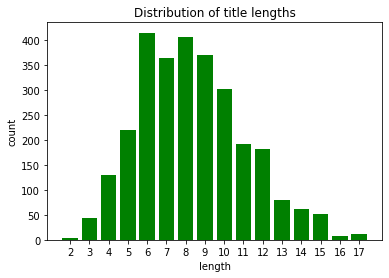

In [5]:
import matplotlib.pyplot as plt

counts = {}
# print(products[0])
for product in products:
#     print(product['keyValuePairs']['extras'])
    # if product['keyValuePairs']['origin'].strip() and product['keyValuePairs']['origin'].lower() in product['title'].lower():
    #     print('abc')
    count = product['title'].count(' ')+1
    if count == 17:
        print(product['title'])
    counts[count] = counts.get(count, 0) + 1

plt.bar(counts.keys(), counts.values(), color='g', tick_label=list(counts.keys()))
plt.title(f'Distribution of title lengths')
plt.xlabel('length')
plt.ylabel('count')
plt.savefig(f'pl_wdc_title_length_distribution.png')
plt.show()


{'amount': ['4 szt.'], 'image_url': ['https://leclercdrive.lublin.pl/132663-large_default/mola-ultra-chlonne-reczniki-papierowe-4-rolki.jpg'], 'url': ['https://leclercdrive.lublin.pl/reczniki-papierowe/1060501443-mola-ultra-chlonne-reczniki-papierowe-4-rolki-5903683001706.html'], 'capacity': ['3.6 l'], 'ingredients': ['5-15%: anionowe środki powierzchniowo czynne\n<5%: niejonowe środki powierzchniowo czynne\nmydło\nBenzisothiazolinone\nMethylisothiazolinone\nkompozycja zapachowa\nCitronellol\nLinalool'], 'origin': ['"Kraj pochodzenia","Produkt UE"'], 'storage': ['Data ważności: 2 lat od daty produkcji podanej na opakowaniu'], 'weight': ['Waga netto 30 ml'], 'extras': ['Substancje słodzące: Zawiera']}
{'amount': 2699, 'image_url': 2842, 'url': 2842, 'capacity': 1558, 'ingredients': 2229, 'origin': 843, 'storage': 1776, 'weight': 1465, 'extras': 478}
full sum for amount: 1175


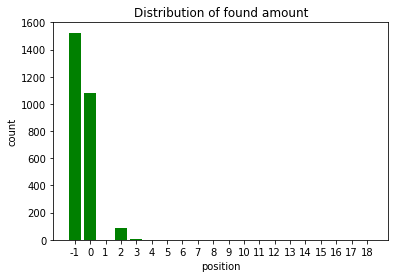

full sum for capacity: 774


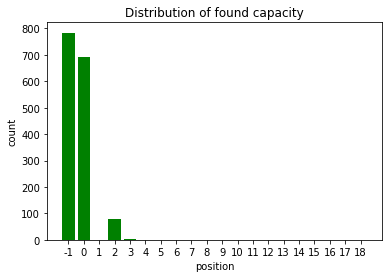

full sum for storage: 0


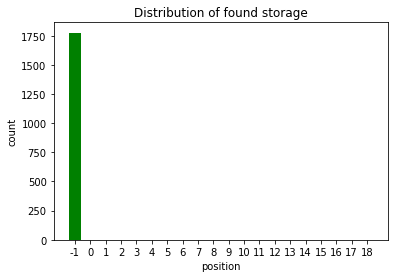

In [14]:
examples = {}
keywords_counts = {}
for product in products:
    for k, v in product['keyValuePairs'].items():
        if v.strip():
            if k not in examples:
                examples[k] = [v.strip()]
            if k in keywords_counts:
                keywords_counts[k] += 1
            else:
                keywords_counts[k] = 1

print(examples)
print(keywords_counts)


def coverage_of_kv(products, kv):
    pos_dict = {}
    for i in range(19):
        pos_dict[i] = 0
    for product in products:
        if kv in product['keyValuePairs'] and product['keyValuePairs'][kv].strip():
            # print(product['keyValuePairs'][kv])
            pos = find_position(product['title'].lower(), product['keyValuePairs'][kv].lower())
            if pos != -1:
                pos = product['title'].count(' ') - (pos+product['keyValuePairs'][kv].count(' '))
#             if pos > 2:
#                 print(pos, product['title'].count(' '), product['keyValuePairs'][kv].count(' '))
#                 print(product['title'])
            pos_dict[pos] = pos_dict.get(pos, 0) + 1
            # if pos != -1:
            #     pos_dict['full'] += 1
    return pos_dict

# kv_cov = coverage_of_kv(products, 'amount')
# plt.bar(kv_cov.keys(), kv_cov.values(), color='g', tick_label=list(kv_cov.keys()))
# plt.title('Distribution of found amount')
# plt.xlabel('position')
# plt.ylabel('count')


for kv in ['amount', 'capacity', 'storage']:
    kv_cov = coverage_of_kv(products, kv)
    plt.bar(kv_cov.keys(), kv_cov.values(), color='g', tick_label=list(kv_cov.keys()))
    print(f'full sum for {kv}: {sum([x for k,x in kv_cov.items() if k != -1])}')
    plt.title(f'Distribution of found {kv}')
    plt.xlabel('position')
    plt.ylabel('count')
    plt.savefig(f'pl_wdc_{kv}_distribution.png')
    plt.show()

In [7]:
# for product in products:
#     print(product['keyValuePairs']['amount'],
#           '#',
#           product['keyValuePairs']['capacity'])

In [8]:
c = 0
ca = 0
cc = 0
for product in products:
    amount = product['keyValuePairs']['amount'].strip().lower()
    capacity = product['keyValuePairs']['capacity'].strip().lower()
    if amount:
        ca += 1
    if capacity:
        cc += 1
    if amount and capacity and amount == capacity:
        c += 1

print(c)

1547


In [9]:
def lengths_of_kv(products, kv):
    lengths = {}
    for product in products:
        if kv in product['keyValuePairs'] and product['keyValuePairs'][kv].strip():
            pos = find_position(product['title'], product['keyValuePairs'][kv])
            kv_len = product['keyValuePairs'][kv].count(' ')+1
            if pos != -1:
                print(pos)
                print(product['keyValuePairs'][kv])
                print(product['title'])
                print('###')
                lengths[kv_len] = lengths.get(kv_len, 0) + 1
    return lengths

amounts_lengths = lengths_of_kv(products, 'amount')
print(amounts_lengths)

12
30 ml
Air Wick Life Scents Pachnące patyczki o zapachu tajemniczych ogrodów z dzieciństwa 30 ml
###
8
500 ml
Tiger Nitro Gazowany napój energetyzujący o smaku limonki 500 ml
###
7
28 x 22 g
Woolite Pro-Care Kapsułki do prania 616 g (28 x 22 g)
###
6
0,5 l
Nałęczowianka Naturalna woda mineralna delikatnie gazowana 0,5 l
###
5
900 ml
Kubuś Sok marchew brzoskwinia jabłko 900 ml
###
9
500 ml
Clin Lemon Płyn do mycia powierzchni szklanych opakowanie uzupełniające 500 ml
###
8
300 ml
Glade Pure Clean Linen Odświeżacz powietrza w aerozolu 300 ml
###
11
50 g
Bref WC Color Aktiv+ Zawieszka do muszli WC eukaliptus 2 x 50 g
###
5
1 kg
Kret Żel do udrożniania rur 1 kg
###
8
300 g
Dosia Multi Powder Proszek do prania tkanin białych 300 g (4 prania)
###
4
500 ml
Fanta Shokata Napój gazowany 500 ml
###
11
500 ml
Seventh Generation Fresh Citrus & Ginger Scent Płyn do mycia naczyń 500 ml
###
8
7 ml
Kiwi Express Shine Gąbka nabłyszczająca do obuwia brązowa 7 ml
###
8
1,5 l
Staropolanka 2000 Naturalna

In [10]:
amounts_set = set()
for product in products:
    amounts_set.add(product['keyValuePairs']['amount'].strip())

print(amounts_set)

{'', '1 L', '7 ml', '562 ml', '4,5 kg', '60 szt.', '1 kg', '700 g', '300.0 ml', '75 ml', '1,8 l', '0,75 l', '616 g', '400 g', '555 ml', '0,7 l', '3.60 L', '45 g', '1.25 L', '32 szt.', '1.75 l', '747 ml', '9 l', '40 szt.', '999 ml', '848 g', '12 x 0,5 L', '3l', '800 g', '20 ml', '3 kg', '30 szt.', '50 ml', '640 g', '2.7 Kilograms', '899 ml', '4.50 kg', '0 szt.', '1 szt.', '6 szt. x 1.5 l', '63 szt.', '2.775 l', '558 g', '1009', '2.7 l', '0,9 l', '1800.0 ml', '48 szt.', '3.6 l', '250 g', '210.0 Grams', '140.0 Grams', '450 ml', '4,5 L', '5 l', '330 ml', '419 ml', '414 ml', '70 x 18,2 g', '3.51 kg', '850 ml ml', '1.5 kg', '0.75 L', '85 szt.', '2 x 55 g', '500 g', '1.38 L', '3.00 kg', '1,25 L', '2.64 L', '780 ml', '3.375 kg', '900.0 ml', '30 ml', '335 ml', '1.8 l', '1,4 l', '4 x 330 ml', '54 szt.', '25 szt.', '450.0 ml', '9.00 L', '269 ml', '6.30 kg', '45 x 18,2 g', '30 g', '90 szt.', '2.50 L', '400 ml', '165 g', '18 szt.', '3.30 L', '12 szt.', '2.2 l', '552 g', '9.75 kg', '1050 g', '1.42 L

In [11]:
import re


def find_units(title, data_tags, reg):
    title = title
    p = re.compile(reg)
    for m in p.finditer(title):
        b_pos = title[:m.span()[0]].count(' ')
        i_pos_end = title[:m.span()[1]].count(' ')
        print(b_pos, i_pos_end)
        i_pos = list(range(b_pos+1, i_pos_end+1))
        first_position = title[:m.start()].count(' ')
        data_tags[b_pos] = 'B-ORG'
        for pos in i_pos:
            data_tags[pos] = 'I-ORG'
        
regex1 = r'([0-9]*[.,])?[0-9]+[ ]{0,}(g|mg|l|ml|kg|L|szt|szt\.|sztuk|litrów|litrow|gram|gramów|miligramów|miligramow|miligram|kilogram|kilogramów|litres|kilograms|miligrams|grams)+'
regex2 = r'\d+[ ]{0,}x[ ]{0,}([0-9]*[.,])?[0-9]+[ ]{0,}(g|mg|l|ml|kg|L|szt|szt\.|sztuk|litrów|litrow|gram|gramów|miligramów|miligramow|miligram|kilogram|kilogramów|litres|kilograms|miligrams|grams)+'

matches = 0
for amount in amounts_set:
    if not(re.match(regex1, amount.lower()) or re.match(regex2, amount.lower())):
        print(amount)
    

title = 'abc def brand 30 x 8 g'
tags = ['O'] * (title.count(' ')+1)
print(title, tags)

find_units(title, tags, regex1)
find_units(title, tags, regex2)
print(title, tags)


1009
888
744
abc def brand 30 x 8 g ['O', 'O', 'O', 'O', 'O', 'O', 'O']
5 6
3 6
abc def brand 30 x 8 g ['O', 'O', 'O', 'B-ORG', 'I-ORG', 'I-ORG', 'I-ORG']


In [12]:
def find_entity_by_match(product, element, tag_b, tag_i, data_tags):
    data_sentence = str(product['title'])
    brand = element
    pos = data_sentence.find(brand)
    n_brand = brand.count(' ') + 1
    if pos > -1:
        first_position = data_sentence[:pos].count(' ')
        for i_brand in range(n_brand):
            tag = tag_b
            if i_brand > 0:
                tag = tag_i
            data_tags[first_position+i_brand] = tag


In [13]:
ner_data_sentences = []
ner_data_tags = []

ids = []
for idx, product in enumerate(products):
    title = product['title']
    title_split = product['title'].split()

    n_title = len(title_split)
    product_ner_data_tags = ['O'] * n_title

    find_entity_by_match(product, product['brand'], 'B-PER', 'I-PER', product_ner_data_tags)
    
    find_entity_by_match(product, product['keyValuePairs']['amount'], 'B-ORG', 'I-ORG', product_ner_data_tags)
    
    find_units(product['title'].lower(), )
    

    ner_data_sentences.append(title_split)
    ner_data_tags.append(product_ner_data_tags)


print(len(ner_data_tags))

TypeError: find_units() missing 2 required positional arguments: 'data_tags' and 'reg'

In [ ]:
output_count = len(ner_data_sentences)

RESULTS_PATH = os.path.join(os.path.abspath(''), "../ner_dataset_WDC")

parts = [
    {"label": "train", "start": 0.0, "end": 0.8},
    {"label": "test", "start": 0.8, "end": 1.0},
    {"label": "valid", "start": 0.8, "end": 1.0}
]

for part in parts:
    part_path = os.path.join(RESULTS_PATH, f"{part['label']}.txt")
    start = int(output_count * part['start'])
    end = int(output_count * part['end'])

    result_file = open(part_path, 'w+')

    for idx in range(start, end):
        data_sentence = ner_data_sentences[idx]
        data_tags = ner_data_tags[idx]
        for token, tag in zip(data_sentence, data_tags):
            result_file.write(f'{token}\t{tag}\n')
        result_file.write('\n')
    result_file.close()
